# AIWIN-互联网舆情企业风险事件的识别和预警

赛题链接：http://ailab.aiwin.org.cn/competitions/48

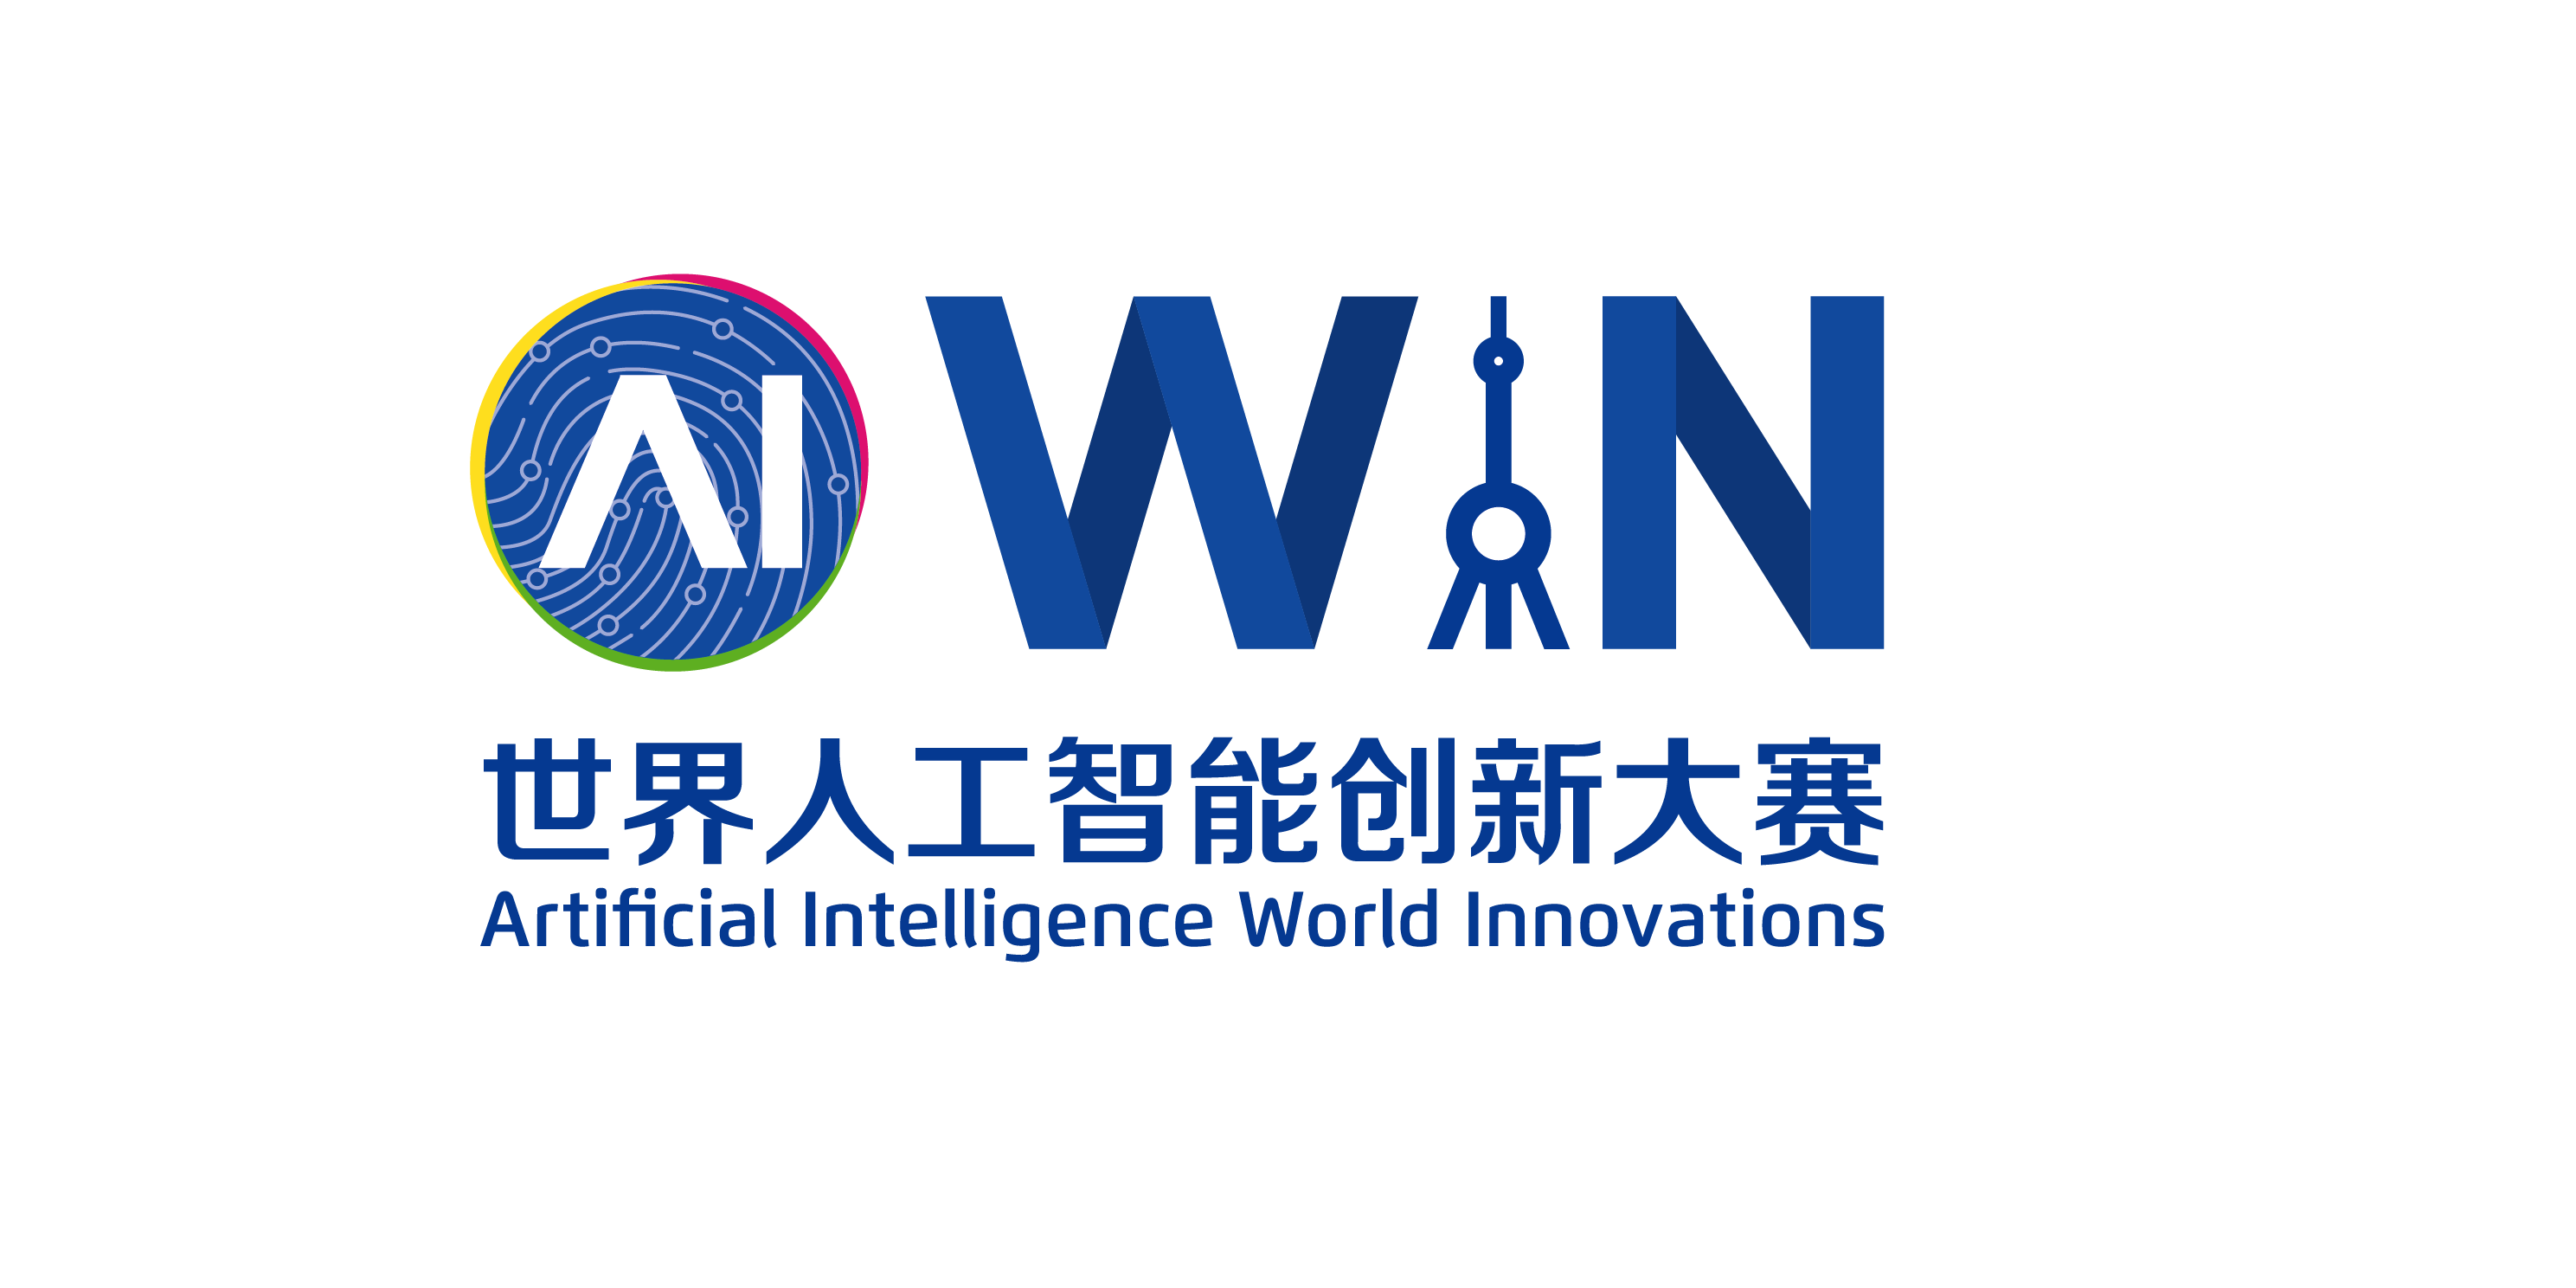


## 赛题数据

http://ailab.aiwin.org.cn/competitions/48#learn_the_details-overview

赛题面向报名的选手提供互联网新闻标题数据作为训练集，数据在「参赛提交」标签下「下载」栏目中获取：

| 列名               | 数据类型       | 能否为空 |              | 备注                                                         |
| ------------------ | -------------- | -------- | ------------ | ------------------------------------------------------------ |
| NEWS_BASICINFO_SID | NUMBER(22)     | NOT NULL | 新闻ID       |                                                              |
| NEWS_TITLE         | VARCHAR2(3000) |          | 新闻标题     |                                                              |
| ABSTRACT           | VARCHAR2(4000) |          | 摘要         |                                                              |
| CONTENT            | CLOB           |          | 正文         |                                                              |
| AUTHOR             | VARCHAR2(1000) |          | 作者         |                                                              |
| SRC_URL            | VARCHAR2(1000) |          | 下载源地址   |                                                              |
| SOURCE_TYPE        | VARCHAR2(100)  |          | 文章类型     | 01-新闻；02-论坛；03-博客；04-微博；05-平媒；06-微信；07-视频；08-长微博；09-APP；10-评论；99-其他 |
| PUBLISH_SITE       | VARCHAR2(100)  |          | 来源         |                                                              |
| FIRST_WEB          | VARCHAR2(100)  |          | 首发网站名称 |                                                              |
| CHANNEL            | VARCHAR2(100)  |          | 网站频道     |                                                              |
| NOTICE_DT          | DATE           |          | 发布时间     |                                                              |
| COMPANY_NM         | VARCHAR2(300)  |          | 企业名称     |                                                              |
| LABEL              | VARCHAR2(60)   |          | 业务标签     | 主板/创业板/中小板/债券退市债务逾期实控人变更破产重整股票质押率过高被政府职能部门处罚被监管机构罚款或查处被采取监管措施重大诉讼仲裁信息披露违规等 |

## 赛题背景

近些年来，资本市场违约事件频发，财务造假、董事长被抓、股权质押爆仓、城投非标违约等负面事件屡屡出现。而在大数据和人工智能技术加持下，各种新兴的金融风险控制手段也正在高速发展，其中通过采集互联网上的企业舆情信息来挖掘潜在风险事件是一种较为有效的方式。但这些风险信息散落在互联网上的海量资讯中，若能从中及时识别出涉及企业的风险事件，并挖掘出潜在的风险特征，将使得银行、证券等金融机构在风险监控领域中更及时、全面和直观地掌握客户风险情况，大幅提升识别和揭示风险的能力。而风险事件以文本的形式存在，需要采用人工智能方法进行自然语言理解，实现风险事件的高精度智能识别。

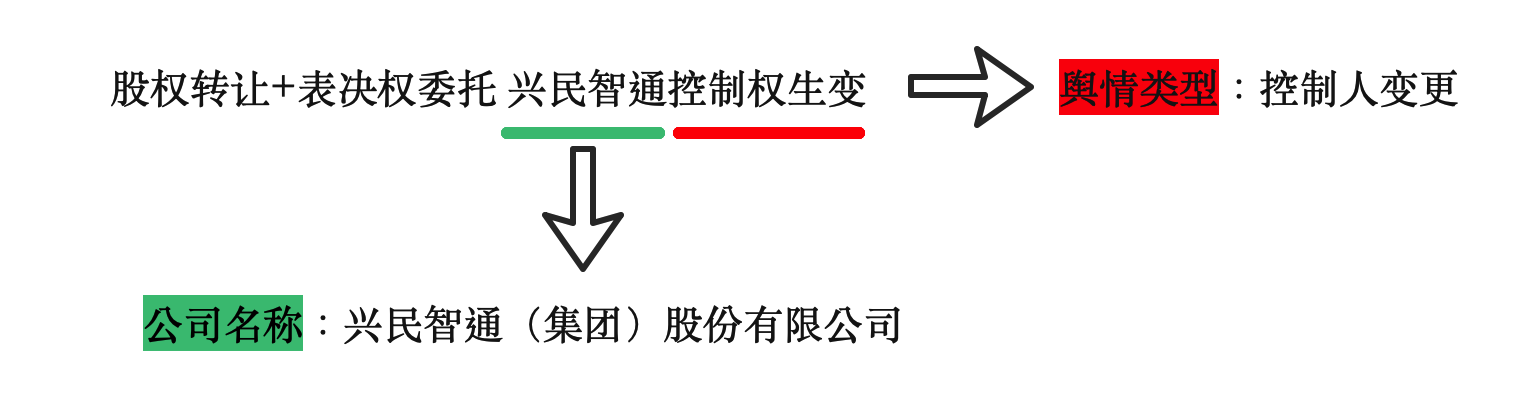

## 赛题任务

从给定的互联网信息中提取、识别出企业主体名称，以及标记风险标签。选手预测标签对应格式为（新闻ID，主体全称，对应风险标签）。

- 每篇互联网信息可能会涉及零到多个主体（公司），每篇互联网信息中对每个主体只预测一个风险标签；

- 赛事会提供一份主体（公司）的全称清单（其范围大于待预测名单），新闻中提及的主体可能为其简称或别名或主体相关的自然人（如其董事长、总经理等），选手提交答案时需要统一识别并将他们映射至主体全称输出在最终的结果文件中。主体全称的映射关系需选手自行处理。

- 请注意在训练集中存在一类「无」标签，其指的是对应的新闻内容中不包含需识别的金融风险事件。对于测试集中此类情况，选手模型在输出时只需准确打上「无」的标签，对应主体留空即可。即输出的为："新闻 ID，，无"。

- 测试集（需选手利用模型进行预测）的数据中会包含一些噪音数据，比如在主体（公司）的全称清单之外的舆情等，选手同样需要对其预测，不计入自动评分。


## 评价方式

- 统一评审阶段

将选手预测结果和答案进行对比计算出F1值，F1越大约好

F1计算公式为：

```
P = 预测对的标签总数 / 预测出的标签数
R = 预测对的标签总数 / 需要预测的总标签数
F1 = 2 * P * R /(P+R)
```

- 代码验证阶段

前 20 强所提交代码将基于扩展的训练集产出结果，并按结果分数排名。赛题专家小组将对前 20 强提交的代码予以检验，判定结果的真实性，并综合结果排名、代码质量、结果真实性等综合因素，最终确定邀请线下答辩的前 10 强队伍。

- 线下答辩阶段

需要选手进行现场答辩，总评分从模型效果、模型设计及答辩表现三方面评判。具体规则待通知。


In [2]:
!ls -l

总用量 14156
-rw-rw-r-- 1 lyz lyz     6622 4月  22 09:57 AIWIN_互联网舆情企业风险事件的识别和预警.ipynb
-rw-rw-r-- 1 lyz lyz 14482755 4月  22 09:58 RISKLABEL_Training.zip
-rw-rw-r-- 1 lyz lyz     1122 4月  22 09:57 T1_ID.zip


In [3]:
!unzip T1_ID.zip

Archive:  T1_ID.zip
  inflating: result.csv              
  inflating: readme.txt              


In [4]:
!unzip RISKLABEL_Training.zip

Archive:  RISKLABEL_Training.zip
  inflating: 1_元数据格式.docx  
  inflating: 2_公司实体汇总_20210414_A1.xlsx  
  inflating: 3_训练集汇总_20210414_A1.xlsx  


## 读取数据

In [43]:
import pandas as pd
import jieba
import numpy as np

%pylab inline
import seaborn as sns

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.simplefilter("ignore")

Populating the interactive namespace from numpy and matplotlib


In [44]:
company_name = pd.read_excel('2_公司实体汇总_20210414_A1.xlsx', names=['name'])

In [45]:
company_name.head()

,name
0,武汉卡伊娜化妆品有限公司
1,北京泰禾锦绣置业有限公司
2,长城新盛信托有限责任公司
3,招商银行股份有限公司
4,中国长城资产管理股份有限公司


In [46]:
train_data = pd.read_excel('3_训练集汇总_20210414_A1.xlsx')
train_data.drop(0, inplace=True, axis=0)
# train_data = train_data[['NEWS_TITLE', 'COMPANY_NM', 'LABEL']]

In [47]:
train_data.head()

,NEWS_BASICINFO_SID,NEWS_TITLE,ABSTRACT,CONTENT,AUTHOR,SRC_URL,SOURCE_TYPE,PUBLISH_SITE,FIRST_WEB,CHANNEL,NOTICE_DT,COMPANY_NM,LABEL,Unnamed: 13
1,70000001,联化科技（德州）有限公司发生爆炸 两人死亡,/,联化科技（德州）有限公司发生爆炸 两人死亡,/,/,/,/,/,/,/,联化科技（德州）有限公司,安全事故,NaN
2,70000002,2005.02.06青岛啤酒股份有限公司火灾,/,2005.02.06青岛啤酒股份有限公司火灾,/,/,/,/,/,/,/,青岛啤酒股份有限公司,安全事故,NaN
3,70000003,2004.02.14河南链鑫科技有限公司火灾,/,2004.02.14河南链鑫科技有限公司火灾,/,/,/,/,/,/,/,河南链鑫科技有限公司,安全事故,NaN
4,70000004,黑龙江：连云港振兴实业集团有限公司一煤矿火灾 21人遇难1人失踪,/,黑龙江：连云港振兴实业集团有限公司一煤矿火灾 21人遇难1人失踪,/,/,/,/,/,/,/,连云港振兴实业集团有限公司,安全事故,NaN
5,70000005,连云港振兴实业集团有限公司杏花煤矿发生火灾 已发现21名遇难者遗体,/,连云港振兴实业集团有限公司杏花煤矿发生火灾 已发现21名遇难者遗体,/,/,/,/,/,/,/,连云港振兴实业集团有限公司,安全事故,NaN


## 数据分析

In [48]:
company_name['name'].apply(len).mean()

13.256668936064864

In [49]:
company_name['name'].apply(len).max()

35

In [50]:
# 较短的公司
company_name[company_name['name'].apply(len) < 10]

,name
25,银亿集团有限公司
33,中路股份有限公司
63,紫光集团有限公司
82,富贵鸟股份有限公司
94,中科建设开发总公司
...,...
16138,中石化销售有限公司
16139,中石油天然气集团
16140,中铁建大桥局集团
16150,冀中能源张矿集团


In [51]:
# 较长的公司
company_name[company_name['name'].apply(len) > 20]

,name
118,中国人民财产保险股份有限公司涟水支公司高沟营销服务部
996,中国太平洋财产保险股份有限公司莱芜中心支公司
1058,拉萨经济技术开发区泰通投资合伙企业（有限合伙）
1455,中国平安财产保险股份有限公司济南第二中心支公司
1546,中华联合财产保险股份有限公司濮阳中心支公司
...,...
15908,中国人寿财产保险股份有限公司烟台市中心支公司
15912,中国人民财产保险股份有限公司莆田市分公司湄洲湾北岸经济开发区营销服务部
15920,湖南娄底农村商业银行股份有限公司湘中路支行
15922,光大证券股份有限公司乌鲁木齐民主路证券营业部


In [54]:
train_data.sample(5)

,NEWS_BASICINFO_SID,NEWS_TITLE,ABSTRACT,CONTENT,AUTHOR,SRC_URL,SOURCE_TYPE,PUBLISH_SITE,FIRST_WEB,CHANNEL,NOTICE_DT,COMPANY_NM,LABEL,Unnamed: 13
9314,79016133,A股异动 | 浙大网新(600797.SH)跌逾6% 收到浙江证监局行政监管措施决定书,NaN,格隆汇12月24日丨浙大网新(600797.SH)盘中曾跌超7%，最低见6.95元创2019...,格隆汇,https://www.gelonghui.com/news/459728,01,格隆汇,格隆汇,格隆汇,2020-12-24 13:35:51,浙大网新科技股份有限公司,被采取监管措施,NaN
6068,69515215,股权转让+表决权委托 兴民智通控制权生变,NaN,"<div class=""content"" id=""qmt_content_div"">\n ...",夏子航,http://ggjd.cnstock.com/company/scp_ggjd/tjd_g...,01,中国证券报,上海证券报,公告快讯,2020-06-02 12:10:26,兴民智通（集团）股份有限公司,实控人变更,NaN
2429,70201780,山东黄金集团董事长陈玉民：继续将优质资源注入上市公司,/,山东黄金集团董事长陈玉民：继续将优质资源注入上市公司,/,/,/,/,/,/,/,/,无,NaN
8000,79363937,四川省泸州市安全生产专项执法行动：发现隐患3488项 罚款637万元,NaN,"<div class=""wb_txt"" id=""p_content1"">\n<div cla...",朱虹,http://m.people.cn/n4/2021/0108/c3770-14675182...,01,手机人民网,手机人民网,政商动态,2021-01-07 17:35:00,泸州益鑫钢铁有限公司,被政府职能部门处罚,NaN
2856,70202208,大唐集团企业开放日启动“零距离”感受现代商贸物流企业,NaN,大唐集团企业开放日启动“零距离”感受现代商贸物流企业,/,/,NaN,/,/,/,/,/,无,NaN


In [11]:
train_data.head(10)

,NEWS_BASICINFO_SID,NEWS_TITLE,ABSTRACT,CONTENT,AUTHOR,SRC_URL,SOURCE_TYPE,PUBLISH_SITE,FIRST_WEB,CHANNEL,NOTICE_DT,COMPANY_NM,LABEL,Unnamed: 13
1,70000001,联化科技（德州）有限公司发生爆炸 两人死亡,/,联化科技（德州）有限公司发生爆炸 两人死亡,/,/,/,/,/,/,/,联化科技（德州）有限公司,安全事故,NaN
2,70000002,2005.02.06青岛啤酒股份有限公司火灾,/,2005.02.06青岛啤酒股份有限公司火灾,/,/,/,/,/,/,/,青岛啤酒股份有限公司,安全事故,NaN
3,70000003,2004.02.14河南链鑫科技有限公司火灾,/,2004.02.14河南链鑫科技有限公司火灾,/,/,/,/,/,/,/,河南链鑫科技有限公司,安全事故,NaN
4,70000004,黑龙江：连云港振兴实业集团有限公司一煤矿火灾 21人遇难1人失踪,/,黑龙江：连云港振兴实业集团有限公司一煤矿火灾 21人遇难1人失踪,/,/,/,/,/,/,/,连云港振兴实业集团有限公司,安全事故,NaN
5,70000005,连云港振兴实业集团有限公司杏花煤矿发生火灾 已发现21名遇难者遗体,/,连云港振兴实业集团有限公司杏花煤矿发生火灾 已发现21名遇难者遗体,/,/,/,/,/,/,/,连云港振兴实业集团有限公司,安全事故,NaN
6,70000006,连云港振兴实业集团有限公司一煤矿发生火灾事故21人遇难1人失踪,/,连云港振兴实业集团有限公司一煤矿发生火灾事故21人遇难1人失踪,/,/,/,/,/,/,/,连云港振兴实业集团有限公司,安全事故,NaN
7,70000007,四川金路集团股份有限公司关于子公司发生氯乙烯中毒事故的公告,/,四川金路集团股份有限公司关于子公司发生氯乙烯中毒事故的公告,/,/,/,/,/,/,/,四川金路集团股份有限公司,安全事故,NaN
8,70000008,加加食品集团股份有限公司东方光伏电站12MWp工程火灾报警系统二次...,/,加加食品集团股份有限公司东方光伏电站12MWp工程火灾报警系统二次...,/,/,/,/,/,/,/,加加食品集团股份有限公司,安全事故,NaN
9,70000009,北京古船福兴食品有限公司坍塌事故调查报告出炉,/,北京古船福兴食品有限公司坍塌事故调查报告出炉,/,/,/,/,/,/,/,北京古船福兴食品有限公司,安全事故,NaN
10,70000010,通化矿业（集团）有限责任公司松树煤矿发生煤与瓦斯突出事故,/,通化矿业（集团）有限责任公司松树煤矿发生煤与瓦斯突出事故,/,/,/,/,/,/,/,通化矿业（集团）有限责任公司,安全事故,NaN


In [12]:
# 缺失值统计
for col in train_data.columns[1:-3]:
    print(col, np.mean(train_data[col].fillna('/') == '/'))

NEWS_TITLE 0.0
ABSTRACT 0.9988874625588361
CONTENT 0.0
AUTHOR 0.3464270432178006
SRC_URL 0.315875053487377
SOURCE_TYPE 0.315875053487377
PUBLISH_SITE 0.315875053487377
FIRST_WEB 0.41780059905862216
CHANNEL 0.4154899443731279
NOTICE_DT 0.315875053487377


In [13]:
train_data[train_data['AUTHOR'].fillna('/') != '/']['AUTHOR'].value_counts()

每日经济新闻    341
申万宏源证券    323
格隆汇       304
新浪财经      238
中国经济网     183
         ... 
中国财富网       1
厉健          1
镜像娱乐        1
王亚冉         1
绵阳日报        1
Name: AUTHOR, Length: 1480, dtype: int64

In [14]:
train_data[train_data['SOURCE_TYPE'].fillna('/') != '/']['SOURCE_TYPE'].value_counts()

01    6548
06    1039
05     217
09     114
02      76
Name: SOURCE_TYPE, dtype: int64

## 数据处理

In [15]:
def replace_postfix(s):
    for x in '有限责任公司 股份有限公司 控股股份公司 总公司 有限公司 投资合伙企业 子公司 公司 集团'.split(' '):
        if s[-len(x):] == x:    
            return s[:-len(x)], x
        
    return s, None

company_name['name2'] = company_name['name'].apply(replace_postfix)
company_name['name_short'] = company_name['name2'].apply(lambda x: x[0])
company_name['name_postfix'] = company_name['name2'].apply(lambda x: x[1])

In [16]:
company_name.head()

,name,name2,name_short,name_postfix
0,武汉卡伊娜化妆品有限公司,"(武汉卡伊娜化妆品, 有限公司)",武汉卡伊娜化妆品,有限公司
1,北京泰禾锦绣置业有限公司,"(北京泰禾锦绣置业, 有限公司)",北京泰禾锦绣置业,有限公司
2,长城新盛信托有限责任公司,"(长城新盛信托, 有限责任公司)",长城新盛信托,有限责任公司
3,招商银行股份有限公司,"(招商银行, 股份有限公司)",招商银行,股份有限公司
4,中国长城资产管理股份有限公司,"(中国长城资产管理, 股份有限公司)",中国长城资产管理,股份有限公司


In [17]:
company_name[company_name['name_postfix'].isnull()]

,name,name2,name_short,name_postfix
87,瑞华会计师事务所（特殊普通合伙）,"(瑞华会计师事务所（特殊普通合伙）, None)",瑞华会计师事务所（特殊普通合伙）,None
118,中国人民财产保险股份有限公司涟水支公司高沟营销服务部,"(中国人民财产保险股份有限公司涟水支公司高沟营销服务部, None)",中国人民财产保险股份有限公司涟水支公司高沟营销服务部,None
138,中国工商银行股份有限公司克拉玛依石油分行,"(中国工商银行股份有限公司克拉玛依石油分行, None)",中国工商银行股份有限公司克拉玛依石油分行,None
139,中国工商银行股份有限公司襄阳分行,"(中国工商银行股份有限公司襄阳分行, None)",中国工商银行股份有限公司襄阳分行,None
216,内黄县农村信用合作联社,"(内黄县农村信用合作联社, None)",内黄县农村信用合作联社,None
...,...,...,...,...
15923,东莞银行股份有限公司合肥分行,"(东莞银行股份有限公司合肥分行, None)",东莞银行股份有限公司合肥分行,None
15924,东吴期货有限公司泉州营业部,"(东吴期货有限公司泉州营业部, None)",东吴期货有限公司泉州营业部,None
15926,大信会计师事务所（特殊普通合伙）,"(大信会计师事务所（特殊普通合伙）, None)",大信会计师事务所（特殊普通合伙）,None
15934,衡水银行股份有限公司站前支行,"(衡水银行股份有限公司站前支行, None)",衡水银行股份有限公司站前支行,None


In [18]:
train_data = train_data[['NEWS_TITLE', 'CONTENT','COMPANY_NM', 'LABEL']]

## 构建模型：风险标签识别

In [19]:
from sklearn.preprocessing import LabelEncoder
train_data = train_data.sample(frac = 1.0)

lbl = LabelEncoder().fit(train_data['LABEL'])
train_data['LABEL'] = lbl.transform(train_data['LABEL'])

In [20]:
import jieba

def strcut(s):
    seg_list = jieba.cut(s)
    return ' '.join(list(seg_list))

train_title = train_data['NEWS_TITLE'].apply(strcut)

Building prefix dict from the default dictionary ...
Loading model from cache /tmp/jieba.cache
Loading model cost 0.453 seconds.
Prefix dict has been built successfully.


In [21]:
train_title

9741                        江苏 8 家 银行 因 贷款 管理 问题 遭银 保监局 重罚
1319                                中环 股份 ： 2020 年 年度报告 摘要
3478     沈阳 飞机 工业 （ 集团 ） 有限公司 ： 持续 推动 管理 创新 改革   推进 AOS 管理
11134    互金 情报局   |   央行 旗下 成方 金融 科技 正式 成立 ； 小 i 机器人 对 ...
7065                            北京 科锐 ： 控股 股东 质押 约 1.10 亿股
                               ...                        
1121                       中山 达华 智能 科技股份 有限公司 2015 年度报告 摘要
4061     康得 新 百亿 造假 案 坐实 ， 或 被 强制 退市 ！ 四大 申诉 全遭 证监会 驳回 ...
2880                江西省 高速 集团 宜春 管理中心 新余 收费 所 开展 公众 开放日 活动
4800     宁夏 远高 集团 1 亿元 债券 违约   主 承销商 称难 与 实控人 高红明 取得联系 ...
7958     新 荣昌 ( 870984 ) 关于 公司 收到 肇庆市 生态环境 局 行政处罚 决定书 的 公告
Name: NEWS_TITLE, Length: 11685, dtype: object

### TFIDF

In [38]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(ngram_range=(1,1))
train_title_ttidf = tfidf.fit_transform(train_title)

In [39]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import RidgeClassifier

clf = RidgeClassifier()

In [40]:
from sklearn.model_selection import train_test_split
tr_x, val_x, tr_tfidf, val_tfidf, tr_y, val_y = train_test_split(
    train_data['NEWS_TITLE'], train_title_ttidf, train_data['LABEL'],
    stratify = train_data['LABEL'],
    test_size=0.2
)

In [41]:
clf.fit(tr_tfidf, tr_y)
clf.score(val_tfidf, val_y)

0.8759092854086435

### Bert分类

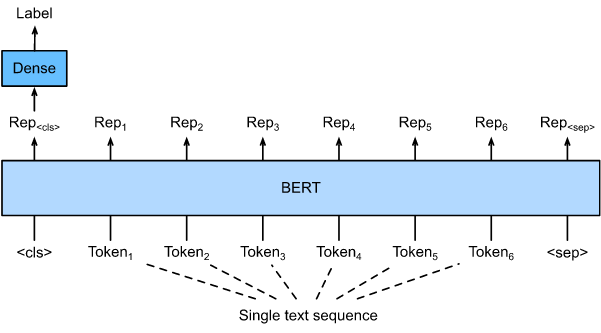

In [26]:
from transformers import BertTokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-chinese')
train_encoding = tokenizer(list(tr_x), truncation=True, padding=True, max_length=128)
val_encoding = tokenizer(list(val_x), truncation=True, padding=True, max_length=128)

In [27]:
from torch.utils.data import Dataset, DataLoader, TensorDataset

class TextDataset(Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels
        
    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels.iloc[idx])
        return item
    
    def __len__(self):
        return len(self.labels)

train_dataset = TextDataset(train_encoding, tr_y)
test_dataset = TextDataset(val_encoding, val_y)

In [28]:
tokenizer("中国人民财产保险股份有限公司涟水支公司高沟营销服务部")

{'input_ids': [101, 704, 1744, 782, 3696, 6568, 772, 924, 7372, 5500, 819, 3300, 7361, 1062, 1385, 3878, 3717, 3118, 1062, 1385, 7770, 3765, 5852, 7218, 3302, 1218, 6956, 102], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}

In [29]:
from transformers import BertForSequenceClassification 
model = BertForSequenceClassification.from_pretrained('bert-base-chinese', num_labels=13)

Some weights of the model checkpoint at bert-base-chinese were not used when initializing BertForSequenceClassification: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPretraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

In [30]:
train_data.shape, tr_tfidf.shape

((11685, 4), (9348, 16871))

In [31]:
import torch
from transformers import AutoModelForSequenceClassification, AdamW, get_linear_schedule_with_warmup
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model.to(device)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=32, shuffle=True)

optim = AdamW(model.parameters(), lr=5e-5)
total_steps = len(train_loader) * 1
loss_function = torch.nn.CrossEntropyLoss()
scheduler = get_linear_schedule_with_warmup(optim, 
                                            num_warmup_steps = 0, # Default value in run_glue.py
                                            num_training_steps = total_steps)

In [32]:
def flat_accuracy(preds, labels):
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return np.sum(pred_flat == labels_flat) / len(labels_flat)

def train():
    model.train()
    total_train_loss = 0
    iter_num = 0
    total_iter = len(train_loader)
    for batch in train_loader:
        optim.zero_grad()
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)
        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        # loss = outputs[0]
        
        loss = loss_function(outputs[1], labels)
        
        total_train_loss += loss.item()
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
        optim.step()
        scheduler.step()

        iter_num += 1
        if(iter_num % 100==0):
            print("epoth: %d, iter_num: %d, loss: %.4f, %.2f%%" % (epoch, iter_num, loss.item(), iter_num/total_iter*100))
        
    print("Epoch: %d, Average training loss: %.4f"%(epoch, total_train_loss/len(train_loader)))
    
def validation():
    model.eval()
    total_eval_accuracy = 0
    total_eval_loss = 0
    for batch in test_dataloader:
        with torch.no_grad():
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['labels'].to(device)
            outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs[0]
        logits = outputs[1]

        total_eval_loss += loss.item()
        logits = logits.detach().cpu().numpy()
        label_ids = labels.to('cpu').numpy()
        total_eval_accuracy += flat_accuracy(logits, label_ids)
        
    avg_val_accuracy = total_eval_accuracy / len(test_dataloader)
    print("Accuracy: %.4f" % (avg_val_accuracy))
    print("Average testing loss: %.4f"%(total_eval_loss/len(test_dataloader)))
    print("-------------------------------")
    

for epoch in range(4):
    print("------------Epoch: %d ----------------" % epoch)
    train()
    validation()

------------Epoch: 0 ----------------
epoth: 0, iter_num: 100, loss: 0.7529, 34.13%
epoth: 0, iter_num: 200, loss: 0.4986, 68.26%
Epoch: 0, Average training loss: 0.7961
Accuracy: 0.8492
Average testing loss: 0.4957
-------------------------------
------------Epoch: 1 ----------------
epoth: 1, iter_num: 100, loss: 0.4518, 34.13%
epoth: 1, iter_num: 200, loss: 0.2276, 68.26%
Epoch: 1, Average training loss: 0.4353
Accuracy: 0.8492
Average testing loss: 0.4957
-------------------------------
------------Epoch: 2 ----------------
epoth: 2, iter_num: 100, loss: 0.3224, 34.13%
epoth: 2, iter_num: 200, loss: 0.4535, 68.26%
Epoch: 2, Average training loss: 0.4325
Accuracy: 0.8492
Average testing loss: 0.4959
-------------------------------
------------Epoch: 3 ----------------


KeyboardInterrupt: 

## 构建模型：公司主体识别

### 规则匹配

In [95]:
for row in train_data.iloc[:100].iterrows():
    match1 = company_name[company_name['name'].apply(lambda x: x in row[1].NEWS_TITLE)]
    if match1.shape[0] > 0:
        match1.loc[:, 'name_len'] = match1['name'].apply(len)
        match1 = match1.sort_values(by='name_len')
        match1 = match1.iloc[-1]['name']
    else:
        match1 = ''
    
    match2 = company_name[company_name['name_short'].apply(lambda x: x in row[1].NEWS_TITLE)]
    if match2.shape[0] > 0 and match1 == '':
        match2.loc[:, 'name_len'] = match2['name_short'].apply(len)
        match2 = match2.sort_values(by='name_len')
        match2 = match2.iloc[-1]['name']
    else:
        match2 = ''
    
    print('标题：', row[1].NEWS_TITLE)
    print('主体标签：', row[1]['COMPANY_NM'])
    print('主体识别结果：', match1 + match2)
    print('')
    
    # break

标题： 东阳光(600673.SH)：控股股东一致行动人宜昌东阳光药业质押2500万股
主体标签： 宜昌东阳光药业股份有限公司
主体识别结果： 宜昌东阳光药业股份有限公司

标题： 有息负债高达22亿 西王食品遭深交所问询
主体标签： 山东永华投资有限公司
主体识别结果： 西王食品股份有限公司

标题： 日报：旧电池价格上涨？陕西未挂牌电动车禁行；金箭、五星黑马、小刀、小鸟、玉骑铃、欧派、星光、小牛、吉利、力帆……
主体标签： 力帆实业（集团）股份有限公司
主体识别结果： 

标题： 辽宁省铁岭县市场监督管理局公布质量监管双随机抽查情况
主体标签： 铁岭民联化工有限公司
主体识别结果： 

标题： ST舍得：天洋控股持有的公司控股股东沱牌舍得集团70%股权对应的表决权和管理权等将由射洪市人民政府行使，导致公司实际控制人由周政变更为射洪市人民政府。
主体标签： 天洋控股集团有限公司
主体识别结果： 

标题： 关于怀集登云汽配股份有限公司2020年年度股东大会的法律意见书
主体标签： /
主体识别结果： 怀集登云汽配股份有限公司

标题： 千亿市值蒸发超九成，康美药业财务造假坑了谁？
主体标签： 康美药业股份有限公司
主体识别结果： 康美药业股份有限公司

标题： 【校招】美的集团2019届校园招聘
主体标签： /
主体识别结果： 

标题： *ST永泰重整计划获法院裁定批准 债务结构有望优化
主体标签： 永泰能源股份有限公司
主体识别结果： 

标题： 公告解读：如意集团预计一季度盈利增长16%
主体标签： /
主体识别结果： 

标题： 长方集团：股东邓子长质押1000万股
主体标签： 深圳市长方集团股份有限公司
主体识别结果： 

标题： 吉林安图农商行因贷款“三查”严重不尽职被罚30万元  行长遭警告
主体标签： 吉林安图农村商业银行股份有限公司
主体识别结果： 

标题： 高收益、更稳健 温州市工业投资集团有限公司打造专业投资理财平台
主体标签： /
主体识别结果： 

标题： 天津鑫茂科技股份有限公司公告（系列）
主体标签： /
主体识别结果： 

标题： 上海外高桥港区海关关于上海执帆进出口有限公司申报不实行政处罚决定书（沪外港关缉违字〔2020〕0182号）
主体标签： 上海执帆进出口有限公司
主体识别结果： 上海执帆进出口有限公司

标题： 鸿泉物联

### Bert Ner

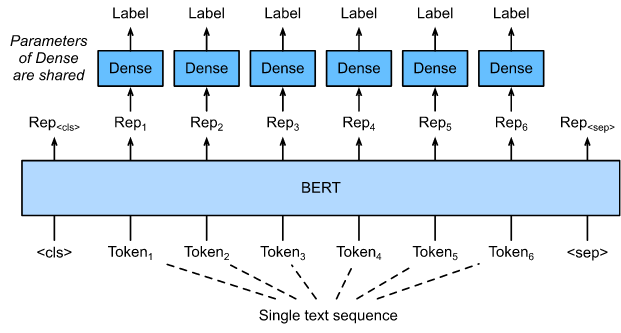

## 后续建议

- Bert 分类和Ner可以同时完成，在一个模型内完成训练。
    - 构建Ner训练集样本    
    - 构建分类loss和Ner loss


- 思考1：舆情类型分类，需要使用复杂的模型吗？
    - TFIDF / fasttext / bert ？
    - 关键词


- 思考2：公司名称如何识别？规则足够么？

- 思考3：如何完成后处理？

- https://github.com/CLUEbenchmark/CLUENER2020
- https://github.com/wainshine/Company-Names-Corpus
- https://tech.meituan.com/2020/07/23/ner-in-meituan-nlp.html

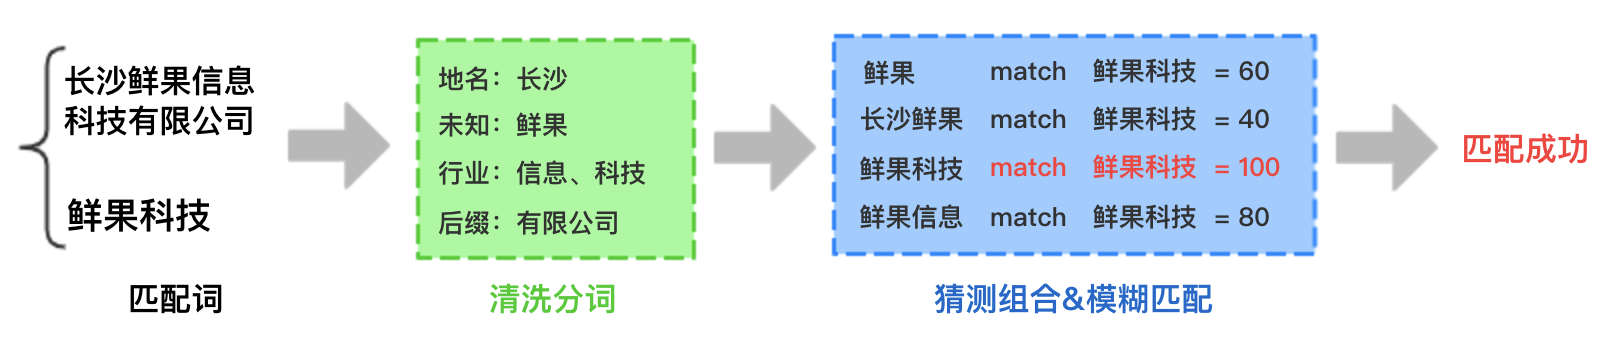

公司名称一般由:

    - 地区（Region）
    - 关键词（X）
    - 行业（Industry）
    - 公司后缀（Org_Suffix）四部分组成。
    
比如【深圳市万网博通科技有限公司】，地区为【深圳市】、【万网博通】是关键词、【科技】是行业词，【有限公司是】公司后缀，这样我们就可以用 【RXIO】 表示此公司的名称结构。

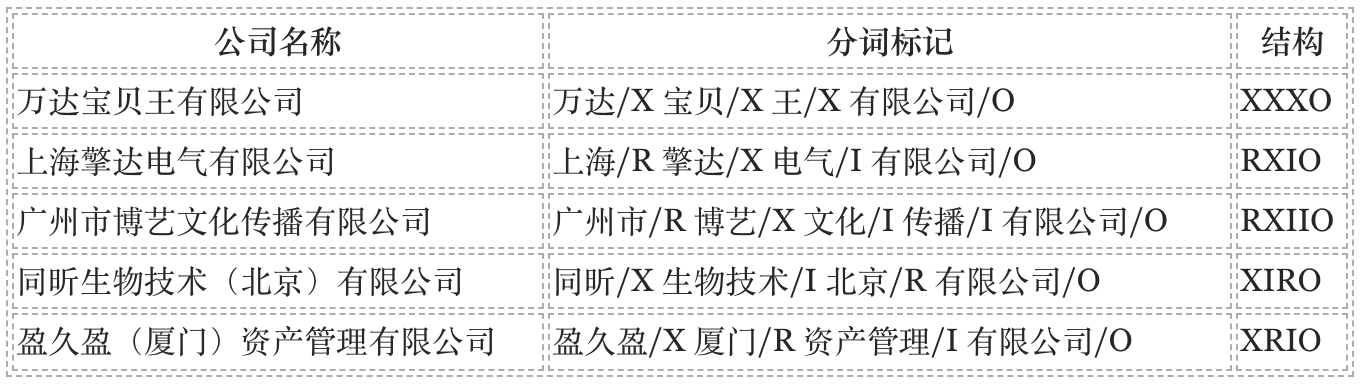

https://cdc.tencent.com/2020/08/30/%e5%a6%82%e4%bd%95%e6%9c%89%e6%95%88%e7%9a%84%e8%bf%9b%e8%a1%8c%e5%85%ac%e5%8f%b8%e5%90%8d%e7%a7%b0%e5%8c%b9%e9%85%8d/